__<span style="font-size: 40px;">Phase 4 Phase</span>__   

---

__<font size="6">1. Business Understanding</font>__   

***<span style="font-size: 24px;">1.1 Overview</span>***

 Companies  produce a number of brands and products and to evaluate this products, companies need to know how they react to the market. Information about how client/customers relate to certain brands and products is important so as to improve on them.

---

***<span style="font-size: 24px;">1.2 Problem Statement</span>*** 

Companies would like to determine how brands and products are perceieved by their respective clientelle. As there is a lot of feedback, it is imposible to really track this responses

---

***<span style="font-size: 24px;">1.3 Business Objective</span>*** 

The objective is to find a way to sort through all the responses received for various brands and products to find out which do well.
  

---

***<span style="font-size: 24px;">1.4 Project Objectives</span>***   

**Main Objective**  

To create a model that can sort through this responses for the various brands and products. 

**Specific Objectives**  

Model should say wheter a response is positive, negative, or no emotion

---

***<span style="font-size: 24px;">1.5 Research Questions</span>***   



---

***<span style="font-size: 24px;">1.6 Success Criteria</span>***    
To suucessfully create a model that can accurately predict 90% of this responses as either positive, negative or no emotion

---

__<font size="6">2. Data Understanding</font>__

***<span style="font-size: 24px;">2.1 Importing Relevant Libraries</span>***

In [161]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

***<span style="font-size: 24px;">2.2 Loading the Data</span>***

In [162]:
nlp_data = pd.read_csv(r'judge-1377884607_tweet_product_company.csv', encoding='latin-1')

nlp_data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


***<span style="font-size: 24px;">2.3 Initial Exploration</span>***

In [163]:
# 2.3.1 Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

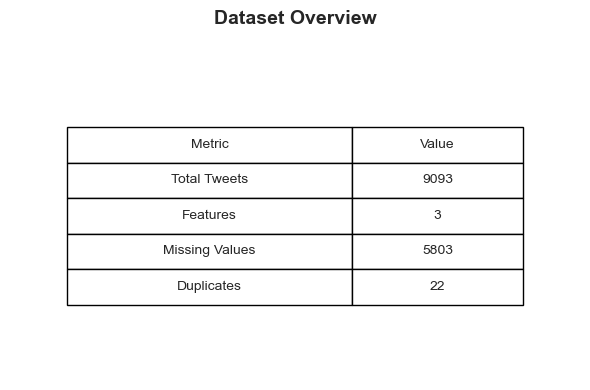

In [164]:
# 2.3.2 Dataset summary
dataset_info = pd.DataFrame({
    'Metric': ['Total Tweets', 'Features', 'Missing Values', 'Duplicates'],
    'Value': [
        nlp_data.shape[0],
        nlp_data.shape[1],
        nlp_data.isnull().sum().sum(),
        nlp_data.duplicated().sum()
    ]
})

# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')

# Create and display the table
table = ax.table(cellText=dataset_info.values,
                 colLabels=dataset_info.columns,
                 cellLoc='center',
                 loc='center',
                 colWidths=[0.5, 0.3])
table.set_fontsize(10)
table.scale(1, 2)
ax.set_title('Dataset Overview', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

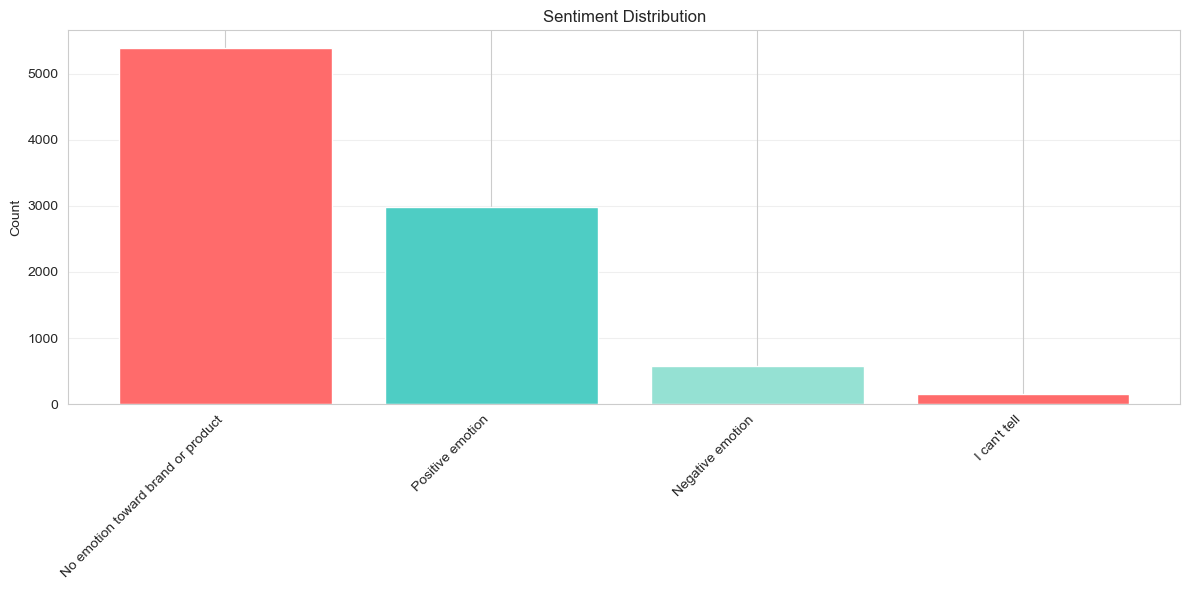

In [165]:
# 2.3.3 Viewing sentiment values
counts = nlp_data['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
colors = ['#ff6b6b', '#4ecdc4', '#95e1d3']

# The Plot
fig, ax = plt.subplots()
ax.bar(range(len(counts)), counts.values, color=colors)
ax.set_xticks(range(len(counts)))
ax.set_xticklabels(counts.index, rotation=45, ha='right')
ax.set(title='Sentiment Distribution', ylabel='Count')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

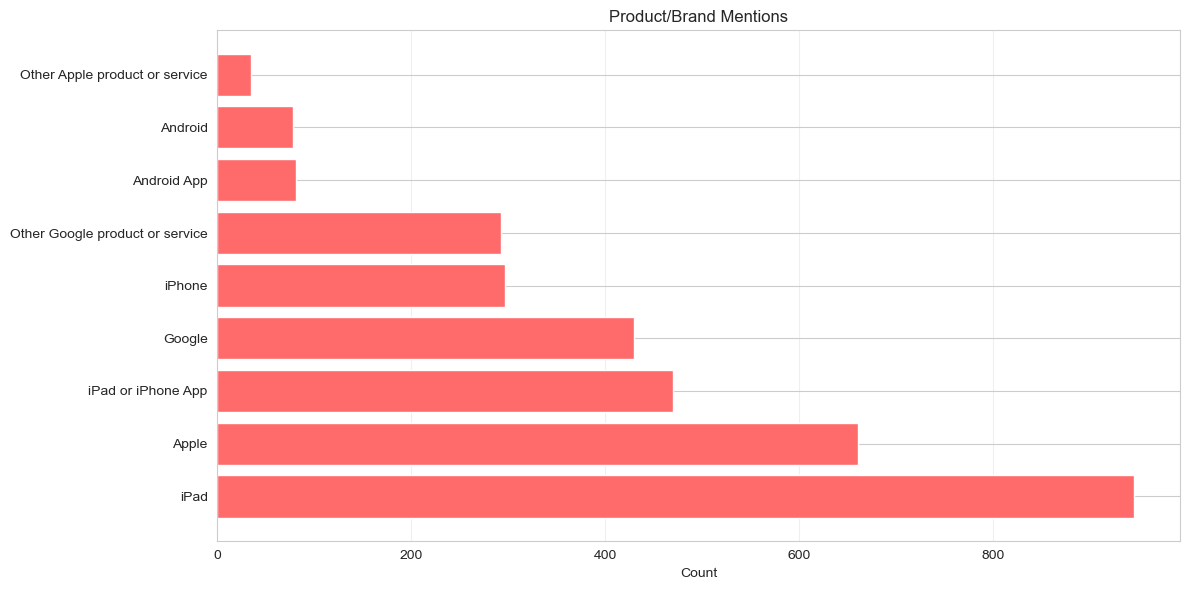

In [166]:
# 2.3.4 Counting brand/product mentions
counts = nlp_data['emotion_in_tweet_is_directed_at'].value_counts()

# The Plot
fig, ax = plt.subplots()
ax.barh(range(len(counts)), counts.values, color='#ff6b6b')
ax.set_yticks(range(len(counts)))
ax.set_yticklabels(counts.index)
ax.set(title='Product/Brand Mentions', xlabel='Count')
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

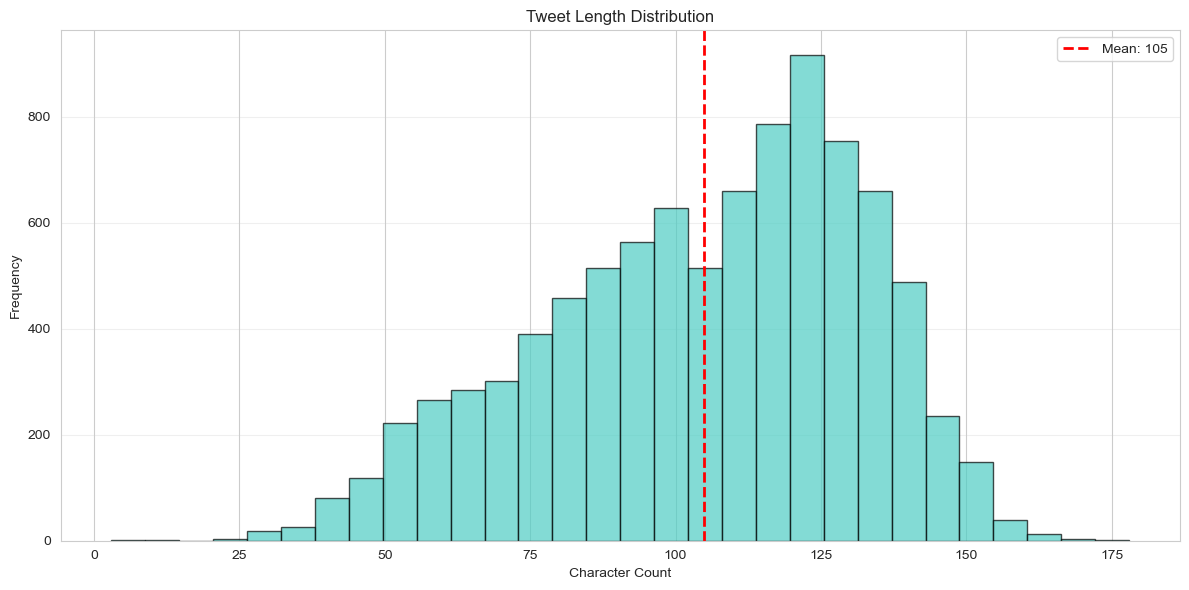

In [167]:
# 2.3.5 Calculating the tweet lengths
nlp_data['tweet_length'] = nlp_data['tweet_text'].astype(str).str.len()
mean_len = nlp_data['tweet_length'].mean()

#  The Plot
fig, ax = plt.subplots()
ax.hist(nlp_data['tweet_length'], bins=30, color='#4ecdc4', edgecolor='black', alpha=0.7)
ax.axvline(mean_len, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_len:.0f}')
ax.set(title='Tweet Length Distribution', xlabel='Character Count', ylabel='Frequency')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

__<font size="6">3. Data Preparation</font>__ 


---


***<span style="font-size: 24px;">3.1 Data Cleaning </span>***

In [168]:
# 3.1.1 Remove rows with missing sentiment labels
nlp_data.dropna(subset=['is_there_an_emotion_directed_at_a_brand_or_product'])

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,29
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,125
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,145
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,140


In [169]:
# 3.1.2 Remove rows with missing tweet text
nlp_data.dropna(subset=['tweet_text'])

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,29
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,125
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,145
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,140


In [ ]:
# 3.1.3 Remove duplicates
nlp_data.drop_duplicates(subset=['tweet_text'], keep='first')


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion,29
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product,125
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product,145
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product,140


***<span style="font-size: 24px;">3.3 Data Inspection</span>***

In this step, we preview the dataset to understand its structure, identify missing values, detect duplicates, and check data types. This helps ensure the data is ready for cleaning and preparation.

In [171]:
#checking the data types.
nlp_data.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
tweet_length                                           int64
dtype: object

In [172]:
#previewing the data
nlp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 4 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
 3   tweet_length                                        9093 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 284.3+ KB


In [173]:
nlp_data.describe()

,tweet_length
count,9093.000000
mean,104.951061
std,27.207164
min,3.000000
25%,86.000000
50%,109.000000
75%,126.000000
max,178.000000
